# OSM and ZIP Code Polygon Downloader

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

pd.set_option("display.max_columns", 100)

## Download ZIP code bounding polygons from census

In [5]:
import importlib.util
import geopandas as gpd

# Strongly recommend you install pyogrio thru conda/pip for 2-4x faster geopandas read/write `conda install pyogrio`
if importlib.util.find_spec('pyogrio'):
    gpd.options.io_engine = "pyogrio"     #If pyogrio installed, tell geopandas to use it.

In [6]:
zcta_df = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2023/ZCTA520/tl_2023_us_zcta520.zip')
zcta_df

,ZCTA5CE20,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,860Z200US47236,B5,G6350,S,1029063,0,+39.1517426,-085.7252769,"POLYGON ((-85.73410 39.15597, -85.72794 39.156..."
1,47870,47870,860Z200US47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,860Z200US47851,B5,G6350,S,53326,0,+39.5735839,-087.2459559,"POLYGON ((-87.24769 39.57450, -87.24711 39.574..."
3,47337,47337,860Z200US47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,860Z200US47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."
...,...,...,...,...,...,...,...,...,...,...,...
33786,37932,37932,860Z200US37932,B5,G6350,S,75093217,4374995,+35.9172993,-084.1987873,"POLYGON ((-84.27347 35.93928, -84.27287 35.940..."
33787,37341,37341,860Z200US37341,B5,G6350,S,87434962,27139990,+35.2199309,-085.0730025,"POLYGON ((-85.15090 35.11231, -85.15088 35.112..."
33788,37849,37849,860Z200US37849,B5,G6350,S,102931713,896866,+36.0540502,-084.0484876,"POLYGON ((-84.14857 36.04234, -84.14240 36.046..."
33789,37754,37754,860Z200US37754,B5,G6350,S,99003113,145391,+36.1390993,-084.0298007,"POLYGON ((-84.10549 36.11168, -84.10543 36.111..."


## Keep Only Zipcode Polygons For Travis County

In [7]:
import pandas as pd

# Get the zip codes (which have area) for Travis County using relationship file from census
travis_zipcodes = pd.read_csv('https://www2.census.gov/geo/docs/maps-data/data/rel2020/zcta520/tab20_zcta520_county20_natl.txt',
                                sep='|',usecols=['GEOID_ZCTA5_20','NAMELSAD_COUNTY_20'],
                                dtype={'GEOID_ZCTA5_20':'Int64'}).query('NAMELSAD_COUNTY_20=="Travis County"')['GEOID_ZCTA5_20'].to_list()

In [8]:
travis_zip_polygons = zcta_df[zcta_df['ZCTA5CE20'].astype(int).isin(travis_zipcodes)].set_index('ZCTA5CE20').sort_index().to_crs(4326)
travis_zip_polygons.to_parquet("data/processed/tl_2023_us_zcta520_travis.parquet")
travis_zip_polygons


,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
ZCTA5CE20,,,,,,,,,,
76574,76574,860Z200US76574,B5,G6350,S,385799364,8568933,+30.5793265,-097.3886183,"POLYGON ((-97.52703 30.47513, -97.52678 30.476..."
78610,78610,860Z200US78610,B5,G6350,S,250909096,918933,+30.0794593,-097.8410108,"POLYGON ((-98.01638 30.13041, -98.01617 30.130..."
78612,78612,860Z200US78612,B5,G6350,S,256587897,1198237,+30.0940710,-097.4950938,"POLYGON ((-97.58383 30.08128, -97.57885 30.085..."
78613,78613,860Z200US78613,B5,G6350,S,71724026,425438,+30.5070795,-097.8194641,"POLYGON ((-97.88294 30.51554, -97.88271 30.515..."
78615,78615,860Z200US78615,B5,G6350,S,141180803,1121546,+30.4631176,-097.3928567,"POLYGON ((-97.52149 30.44063, -97.52148 30.440..."
...,...,...,...,...,...,...,...,...,...,...
78754,78754,860Z200US78754,B5,G6350,S,39207306,12421,+30.3567114,-097.6392807,"POLYGON ((-97.68645 30.34055, -97.68627 30.340..."
78756,78756,860Z200US78756,B5,G6350,S,4326647,0,+30.3222551,-097.7401633,"POLYGON ((-97.74975 30.33449, -97.74918 30.334..."
78757,78757,860Z200US78757,B5,G6350,S,12823683,0,+30.3516703,-097.7326665,"POLYGON ((-97.75517 30.33695, -97.75512 30.337..."


## Use polygons to select and download buildings in ZIP code

In [9]:
import osmnx as ox
# Row 0 and geometry column
buildings_78733 = ox.features_from_polygon(travis_zip_polygons.loc['78733','geometry'],{'building':True})
buildings_78741 = ox.features_from_polygon(travis_zip_polygons.loc['78741','geometry'],{'building':True})

In [10]:
buildings_78741

amenity                      name  \
element_type osmid                                         
way          30769060      NaN                Building M   
             177611734     NaN                       NaN   
             177611735     NaN                       NaN   
             177611736     NaN                       NaN   
             177611737     NaN                       NaN   
...                        ...                       ...   
relation     7770699       NaN  South Shore District One   
             14024130      NaN                       NaN   
             16312227      NaN                       NaN   
             16365382      NaN                       NaN   
             16442331      NaN                       NaN   

                                                                 geometry  \
element_type osmid                                                          
way          30769060   POLYGON ((-97.70459 30.23789, -97.70441 30.237...   
             177611734  POLYGON ((-97.71978 30.23247, -97.71967 30.232...   
             177611735  POLYGON ((-97.71796 30.23253, -97.71773 30.232...   
             177611736  POLYGON ((-97.71813 30.23246, -97.71764 30.232...   
             177611737  POLYGON ((-97.71814 30.23335, -97.71783 30.233...   
...                                                                   ...   
relation     7770699    POLYGON ((-97.72712 30.24303, -97.72711 30.243...   
             14024130   POLYGON ((-97.72095 30.23064, -97.72061 30.231...   
             16312227   POLYGON ((-97.70539 30.22553, -97.70378 30.224...   
             16365382   POLYGON ((-97.70674 30.21857, -97.70664 30.218...   
             16442331   POLYGON ((-97.72262 30.24302, -97.72263 30.243...   

                       access parking description wheelchair  \
element_type osmid                                             
way          30769060     NaN     NaN         NaN        NaN   
             177611734    NaN     NaN         NaN        NaN   
             177611735    NaN     NaN         NaN        NaN   
             177611736    NaN     NaN         NaN        NaN   
             177611737    NaN     NaN         NaN        NaN   
...                       ...     ...         ...        ...   
relation     7770699      NaN     NaN         NaN        NaN   
             14024130     NaN     NaN         NaN        NaN   
             16312227     NaN     NaN         NaN        NaN   
             16365382     NaN     NaN         NaN        NaN   
             16442331     NaN     NaN         NaN        NaN   

                                                                    nodes  \
element_type osmid                                                          
way          30769060   [340267682, 340267683, 340267684, 340267685, 3...   
             177611734  [1880298492, 1880298533, 1880298509, 188029852...   
             177611735  [1880298581, 1880298601, 1880298567, 188029865...   
             177611736  [1880298517, 1880298611, 1880298515, 188029848...   
             177611737  [1880298658, 1880298552, 1880298502, 188029864...   
...                                                                   ...   
relation     7770699    [[[5255691452, 5255691453, 5255691454, 5255691...   
             14024130   [[[6687114885, 6687114886, 9655185141, 6687114...   
             16312227   [[[11182036908, 11182036909, 11182036910, 1118...   
             16365382   [[[11210755006, 11210755007, 11210755008, 1121...   
             16442331   [[[6589752712, 6589752713, 8974967979, 6589752...   

                          building  ref addr:housenumber addr:postcode  \
element_type osmid                                                       
way          30769060      college  NaN              NaN           NaN   
             177611734  apartments  NaN              NaN           NaN   
             177611735  apartments  NaN              NaN           NaN   
             177611736  apartments 

In [11]:
buildings_78733

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                 
node         2823715926    Austin             9433         78733   
way          31768568         NaN              NaN           NaN   
             232903308     Austin             3110         78733   
             291448227     Austin             1705         78733   
             291449889        NaN              700         78733   
...                           ...              ...           ...   
relation     5700447          NaN              549           NaN   
             5700448          NaN              208           NaN   
             5700605          NaN             2904           NaN   
             13660528         NaN              NaN           NaN   
             15570149         NaN              NaN           NaN   

                                    addr:street    building  \
element_type osmid                                            
node         2823715926           Bee Cave Road  commercial   
way          31768568                       NaN         yes   
             232903308          Edgewater Drive         yes   
             291448227   Cuernavaca Drive North         yes   
             291449889   Cuernavaca Drive North      retail   
...                                         ...         ...   
relation     5700447                Brandon Way         yes   
             5700448                Brandon Way         yes   
             5700605              Niagara Drive         yes   
             13660528                       NaN      school   
             15570149                       NaN         yes   

                                                                  geometry  \
element_type osmid                                                           
node         2823715926                         POINT (-97.87315 30.31584)   
way          31768568    POLYGON ((-97.90200 30.32850, -97.90238 30.328...   
             232903308   POLYGON ((-97.85788 30.35358, -97.85765 30.353...   
             291448227   POLYGON ((-97.86321 30.34042, -97.86301 30.340...   
             291449889   POLYGON ((-97.86938 30.33195, -97.86930 30.331...   
...                                                                    ...   
relation     5700447     POLYGON ((-97.85881 30.32587, -97.85886 30.325...   
             5700448     POLYGON ((-97.85996 30.32238, -97.85997 30.322...   
             5700605     POLYGON ((-97.85792 30.35064, -97.85797 30.350...   
             13660528    POLYGON ((-97.88445 30.30281, -97.88455 30.303...   
             15570149    POLYGON ((-97.86857 30.34863, -97.86864 30.348...   

                                  amenity  \
element_type osmid                          
node         2823715926               NaN   
way          31768568                 NaN   
             232903308   community_centre   
             291448227         restaurant   
             291449889                NaN   
...                                   ...   
relation     5700447                  NaN   
             5700448                  NaN   
             5700605                  NaN   
             13660528                 NaN   
             15570149                 NaN   

                                                                     nodes  \
element_type osmid                                                           
node         2823715926                                                NaN   
way          31768568    [355625202, 355625203, 355625205, 355625206, 3...   
             232903308   [2412213426, 2412213427, 2412213428, 241221342...   
             291448227   [2949205726, 2949205727, 2949205728, 294920572...   
             291449889   [2949210990, 2949210991, 2949210992, 294921099...   
...                                                                    ...   
relation     5700447     [[[3863299267, 3863299071, 3863298895, 3863298...   
             570

In [12]:
buildings_78733[['nodes','ways']] = buildings_78733[['nodes','ways']].astype(str)
buildings_78733.to_parquet("data/all_osm_buildings_78733.geoparquet")
buildings_78741[['nodes','ways']] = buildings_78741[['nodes','ways']].astype(str)
buildings_78741.to_parquet("data/all_osm_buildings_78741.geoparquet")

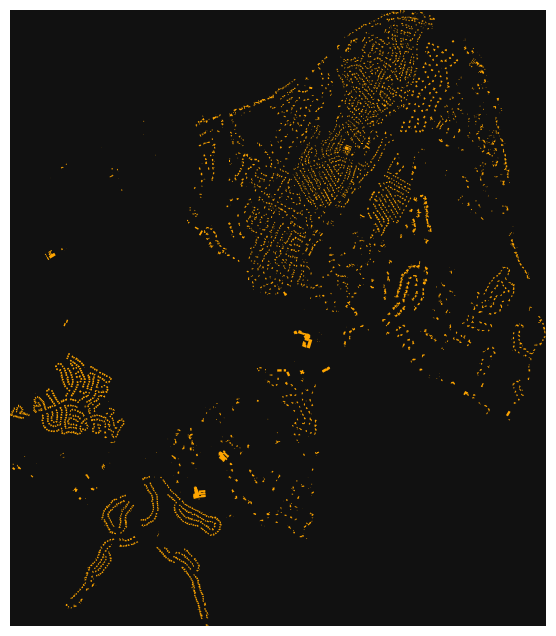

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [13]:
ox.plot_footprints(buildings_78733)

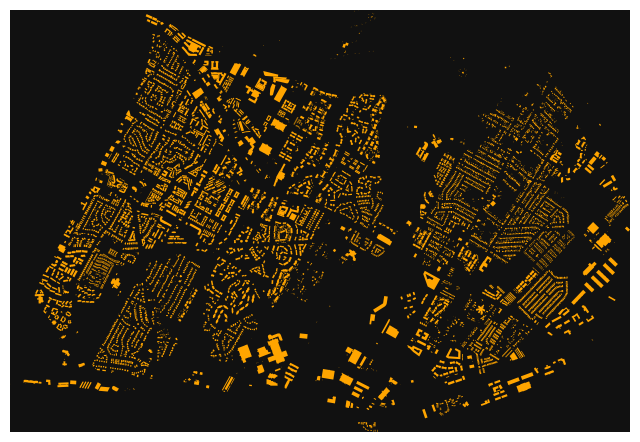

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
ox.plot_footprints(buildings_78741)